In [ ]:
import pandas as pd
import numpy as np

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Entropy calculation function
# -------------------
def calculate_entropy(y):
    """
    Calculate entropy of a categorical target column.
    """
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# -------------------
# Separate target (Category with 14 classes)
# -------------------
if 'Category' in data.columns:
    y_true = data['Category']
else:
    raise ValueError("Dataset must contain 'Category' column.")

# -------------------
# Compute and print entropy
# -------------------
dataset_entropy = calculate_entropy(y_true)
print("Entropy of dataset (Category distribution):", dataset_entropy)
values, counts = np.unique(y_true, return_counts=True)
probabilities = counts / counts.sum()
print("Class labels:", values)
print("Probabilities:", probabilities)
print("Entropy:", calculate_entropy(y_true))


Entropy of dataset (Category distribution): 3.2282347492429087
Class labels: ['Blind or Difficulty Seeing' 'Cataract Surgery'
 'Difficulty Finding Objects' 'Eye Health Provider Interaction'
 'Eye Protection' 'Far-Distance Visual Function'
 'Near-Distance Visual Function' 'Night Vision'
 'Self-Report Age Related Macular Degeneration' 'Self-Report Cataract'
 'Self-Report Diabetic Retinopathy' 'Self-Report Glaucoma'
 'Vision Correction' 'Visual Field']
Probabilities: [0.17376377 0.0131893  0.10551438 0.01348239 0.0839928  0.10551438
 0.21102877 0.10551438 0.0131893  0.0131893  0.0131893  0.0131893
 0.02972826 0.10551438]
Entropy: 3.2282347492429087


In [ ]:
import pandas as pd
import numpy as np

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Gini index calculation function
# -------------------
def calculate_gini(y):
    """
    Calculate Gini index of a categorical target column.
    """
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# -------------------
# Separate target (Category with 14 classes)
# -------------------
if 'Category' in data.columns:
    y_true = data['Category']
else:
    raise ValueError("Dataset must contain 'Category' column.")

# -------------------
# Compute and print Gini index
# -------------------
dataset_gini = calculate_gini(y_true)
print("Gini index of dataset (Category distribution):", dataset_gini)


Gini index of dataset (Category distribution): 0.8717497521277651


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# -------------------
# Entropy function
# -------------------
def calculate_entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# -------------------
# Information Gain function
# -------------------
def information_gain(data, feature, target):
    total_entropy = calculate_entropy(data[target])

    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for i, v in enumerate(values):
        subset = data[data[feature] == v][target]
        prob = counts[i] / counts.sum()
        weighted_entropy += prob * calculate_entropy(subset)

    return total_entropy - weighted_entropy

# -------------------
# Root Node Selection
# -------------------
def find_root_node(data, target):
    features = [col for col in data.columns if col != target]
    ig_scores = {feature: information_gain(data, feature, target) for feature in features}
    root = max(ig_scores, key=ig_scores.get)
    return root, ig_scores

# -------------------
# Load dataset
# -------------------
df = pd.read_csv("dataset(National_Health_Interview_Surve).csv")

# Assume 'Category' is the target (14 classes)
target = 'Category'

# Drop irrelevant columns
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource',
    'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Numerator', 'LocationID', 'DataValueTypeID',
    'GeoLocation', 'Geographic Level', 'StateAbbreviation'
]
df = df.drop(columns=drop_columns, errors='ignore')

# -------------------
# Label encode categorical features (excluding target)
# -------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != target]

df[categorical_cols] = df[categorical_cols].fillna("Unknown")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------
# Find root node
# -------------------
root, scores = find_root_node(df, target)

print("Information Gain for each feature:")
for feature, ig in scores.items():
    print(f"{feature}: {ig:.4f}")

print("\nBest feature for root node:", root)


Information Gain for each feature:
YearStart: 0.5038
YearEnd: 0.5038
Topic: 0.8714
Question: 3.2282
Response: 1.0538
Age: 0.1161
Sex: 0.0012
RaceEthnicity: 0.0003
RiskFactor: 0.0027
RiskFactorResponse: 0.0288
Data_Value: 2.4200
Low_Confidence_Limit: 2.3547
High_Confidence_Limit: 2.4409
Sample_Size: 1.4534
TopicID: 0.8714
CategoryID: 3.2282
QuestionID: 3.2282
ResponseID: 1.0538
AgeID: 0.1161
SexID: 0.0012
RaceEthnicityID: 0.0003
RiskFactorID: 0.0027
RiskFactorResponseID: 0.0288

Best feature for root node: Question


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Target variable
# -------------------
target_col = 'Category'
df = data.copy()

# Remove rows with missing target
df = df[df[target_col].notna()]

# -------------------
# Drop irrelevant columns
# -------------------
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
    'Geographic Level', 'StateAbbreviation'
]
df = df.drop(columns=drop_columns, errors='ignore')

# -------------------
# Custom binning function
# -------------------
def bin_column(series, bin_type="width", bins=4):
    """
    Converts continuous column to categorical bins.

    Parameters:
    - series: Pandas Series (numeric column)
    - bin_type: "width" (equal-width) or "frequency" (equal-frequency)
    - bins: number of bins

    Defaults: bin_type="width", bins=4
    """
    if not np.issubdtype(series.dtype, np.number):
        return series  # already categorical

    if bin_type == "width":
        return pd.cut(series, bins=bins, labels=False, duplicates='drop')
    elif bin_type == "frequency":
        return pd.qcut(series, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("bin_type must be 'width' or 'frequency'")

# -------------------
# Separate categorical & numeric columns
# -------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from feature lists
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# -------------------
# Fill NaNs
# -------------------
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# -------------------
# Apply binning to numeric columns (default: equal-frequency, 4 bins)
# -------------------
for col in numeric_cols:
    df[col] = bin_column(df[col], bin_type="frequency", bins=4)

# -------------------
# Encode categorical features
# -------------------
for col in categorical_cols + numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Encode target
target_le = LabelEncoder()
df[target_col] = target_le.fit_transform(df[target_col])

print(" Preprocessing done: Numeric features binned, categorical features encoded.")
print(df.head())


 Preprocessing done: Numeric features binned, categorical features encoded.
   YearStart  YearEnd  Topic  Category  Question  Response  Age  Sex  \
0          0        0      1         1        11        17    3    2   
1          0        0      1         1        11        17    3    2   
2          0        0      1         1        11        17    3    2   
3          0        0      1         1        11        17    3    2   
4          0        0      1         1        11        17    3    2   

   RaceEthnicity  RiskFactor  ...  Sample_Size  TopicID  CategoryID  \
0              6           0  ...            3        1           1   
1              6           1  ...            1        1           1   
2              6           1  ...            3        1           1   
3              6           1  ...            2        1           1   
4              6           2  ...            3        1           1   

   QuestionID  ResponseID  AgeID  SexID  RaceEthnicityID  RiskFa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# Entropy calculation
# -----------------------------
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9))  # epsilon to avoid log(0)


# -----------------------------
# Information Gain
# -----------------------------
def information_gain(X_col, y):
    total_entropy = entropy(y)
    values, counts = np.unique(X_col, return_counts=True)
    weighted_entropy = 0
    for val, count in zip(values, counts):
        subset_y = y[X_col == val]
        weighted_entropy += (count / len(y)) * entropy(subset_y)
    return total_entropy - weighted_entropy


# -----------------------------
# Decision Node Class
# -----------------------------
class DecisionNode:
    def __init__(self, feature=None, children=None, is_leaf=False, prediction=None):
        self.feature = feature
        self.children = children or {}   # dict: value -> child node
        self.is_leaf = is_leaf
        self.prediction = prediction

    def to_dict(self):
        """Convert tree node to nested dict for readability/printing."""
        if self.is_leaf:
            return self.prediction
        return {self.feature: {val: child.to_dict() for val, child in self.children.items()}}


# -----------------------------
# Decision Tree Class
# -----------------------------
class DecisionTree:
    def __init__(self, max_depth=5, min_samples=2):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.root = None
        self.target = None

    def fit(self, data, target):
        self.target = target
        self.root = self._build_tree(data, depth=0)

    def _build_tree(self, df, depth):
        y = df[self.target].values

        # Stopping criteria
        if (len(np.unique(y)) == 1 or
            len(df) < self.min_samples or
            depth >= self.max_depth):
            return DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])

        # Select best feature
        features = [col for col in df.columns if col != self.target]
        ig_scores = {f: information_gain(df[f].values, y) for f in features}
        best_feature = max(ig_scores, key=ig_scores.get)

        if ig_scores[best_feature] <= 0:
            return DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])

        # Split and recurse
        node = DecisionNode(feature=best_feature)
        for val in np.unique(df[best_feature]):
            subset = df[df[best_feature] == val]
            if subset.empty:
                child = DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])
            else:
                child = self._build_tree(subset, depth + 1)
            node.children[val] = child

        return node

    def predict_one(self, sample):
        node = self.root
        while not node.is_leaf:
            val = sample.get(node.feature)
            if val in node.children:
                node = node.children[val]
            else:
                return node.prediction  # fallback for unseen value
        return node.prediction

    def predict(self, X):
        return X.apply(lambda row: self.predict_one(row), axis=1)

    def to_dict(self):
        return self.root.to_dict()


# -----------------------------
# Example Usage
# -----------------------------
if __name__ == "__main__":
    # Load dataset
    data = pd.read_csv("dataset(National_Health_Interview_Surve).csv")
    target_col = "Category"

    # Drop irrelevant cols
    drop_cols = [
        'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
        'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
        'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
        'Geographic Level', 'StateAbbreviation'
    ]
    data = data.drop(columns=drop_cols, errors="ignore")

    # Drop rows with missing target
    data = data.dropna(subset=[target_col])

    # Fill NaNs
    for col in data.columns:
        if col != target_col:
            if pd.api.types.is_numeric_dtype(data[col]):
                data[col] = data[col].fillna(data[col].median())
                # bin numeric into categories
                data[col] = pd.qcut(data[col], q=4, duplicates="drop").astype(str)
            else:
                data[col] = data[col].fillna("Unknown").astype(str)

    # Train tree
    tree = DecisionTree(max_depth=4, min_samples=5)
    tree.fit(data, target_col)

    # Print tree (dict view)
    print("\nDecision Tree Structure:")
    print(tree.to_dict())

    # Prediction example
    sample_dict = data.iloc[0].drop(target_col).to_dict()
    print("\nSample prediction:", tree.predict_one(sample_dict))



Decision Tree Structure:
{'Question': {'Percentage of adults ever told by a doctor or other health professional they had cataracts (NHIS Adult Module)': 'Self-Report Cataract', 'Percentage of adults ever told by a doctor or other health professional they had diabetic retinopathy (NHIS Adult Module)': 'Self-Report Diabetic Retinopathy', 'Percentage of adults ever told by a doctor or other health professional they had glaucoma (NHIS Adult Module)': 'Self-Report Glaucoma', 'Percentage of adults ever told by a doctor or other health professional they had macular degeneration (NHIS Adult Module)': 'Self-Report Age Related Macular Degeneration', 'Percentage of adults who are blind or unable to see at all (NHIS Adult Module)': 'Blind or Difficulty Seeing', 'Percentage of adults who currently wear eyeglasses or contact lenses (NHIS Adult Module)': 'Vision Correction', 'Percentage of adults who even when wearing glasses or contact lenses find it (not at all, only a little, somewhat, or very) d


Custom Decision Tree Structure:
{'Question': {'Percentage of adults ever told by a doctor or other health professional they had cataracts (NHIS Adult Module)': 'Self-Report Cataract', 'Percentage of adults ever told by a doctor or other health professional they had diabetic retinopathy (NHIS Adult Module)': 'Self-Report Diabetic Retinopathy', 'Percentage of adults ever told by a doctor or other health professional they had glaucoma (NHIS Adult Module)': 'Self-Report Glaucoma', 'Percentage of adults ever told by a doctor or other health professional they had macular degeneration (NHIS Adult Module)': 'Self-Report Age Related Macular Degeneration', 'Percentage of adults who are blind or unable to see at all (NHIS Adult Module)': 'Blind or Difficulty Seeing', 'Percentage of adults who currently wear eyeglasses or contact lenses (NHIS Adult Module)': 'Vision Correction', 'Percentage of adults who even when wearing glasses or contact lenses find it (not at all, only a little, somewhat, or 

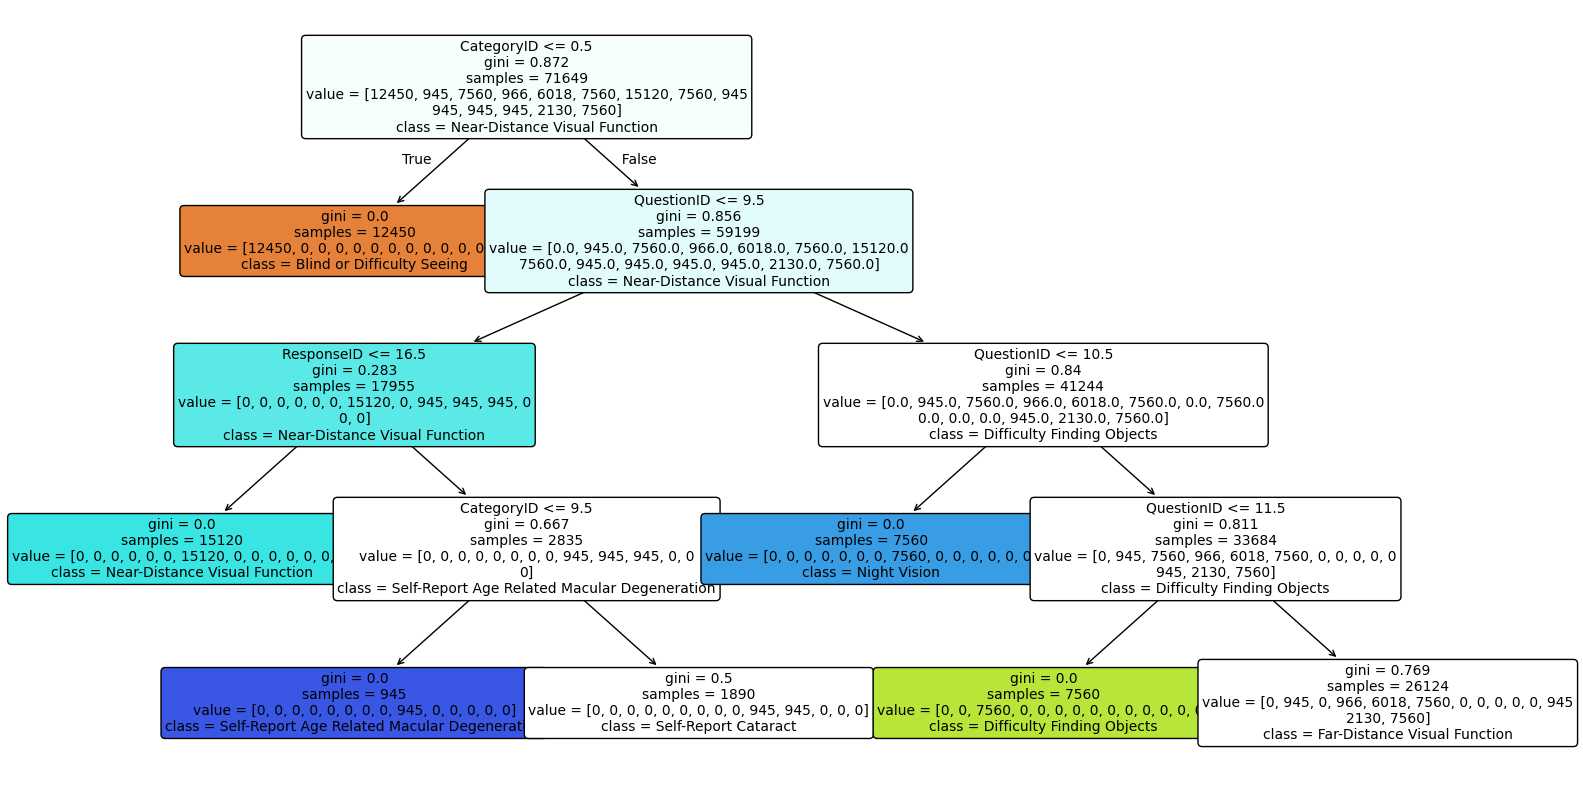

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# -----------------------------
# Entropy Calculation
# -----------------------------
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9))  # epsilon avoids log(0)

# -----------------------------
# Information Gain
# -----------------------------
def information_gain(X_col, y):
    total_entropy = entropy(y)
    values, counts = np.unique(X_col, return_counts=True)
    weighted_entropy = 0
    for val, count in zip(values, counts):
        subset_y = y[X_col == val]
        weighted_entropy += (count / len(y)) * entropy(subset_y)
    return total_entropy - weighted_entropy

# -----------------------------
# Decision Node Class
# -----------------------------
class DecisionNode:
    def __init__(self, feature=None, children=None, is_leaf=False, prediction=None):
        self.feature = feature
        self.children = children or {}   # dict: value -> child node
        self.is_leaf = is_leaf
        self.prediction = prediction

    def to_dict(self):
        """Convert tree node to nested dict for readability/printing."""
        if self.is_leaf:
            return self.prediction
        return {self.feature: {val: child.to_dict() for val, child in self.children.items()}}

# -----------------------------
# Custom Decision Tree Class
# -----------------------------
class DecisionTree:
    def __init__(self, max_depth=5, min_samples=2):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.root = None
        self.target = None

    def fit(self, data, target):
        self.target = target
        self.root = self._build_tree(data, depth=0)

    def _build_tree(self, df, depth):
        y = df[self.target].values

        # Stopping criteria
        if (len(np.unique(y)) == 1 or
            len(df) < self.min_samples or
            depth >= self.max_depth):
            return DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])

        # Select best feature
        features = [col for col in df.columns if col != self.target]
        ig_scores = {f: information_gain(df[f].values, y) for f in features}
        best_feature = max(ig_scores, key=ig_scores.get)

        # If no information gain, make leaf
        if ig_scores[best_feature] <= 0:
            return DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])

        # Split and recurse
        node = DecisionNode(feature=best_feature)
        for val in np.unique(df[best_feature]):
            subset = df[df[best_feature] == val]
            if subset.empty:
                child = DecisionNode(is_leaf=True, prediction=pd.Series(y).mode()[0])
            else:
                child = self._build_tree(subset, depth + 1)
            node.children[val] = child

        return node

    def predict_one(self, sample):
        node = self.root
        while not node.is_leaf:
            val = sample.get(node.feature)
            if val in node.children:
                node = node.children[val]
            else:
                return node.prediction  # fallback for unseen values
        return node.prediction

    def predict(self, X):
        return X.apply(lambda row: self.predict_one(row), axis=1)

    def to_dict(self):
        return self.root.to_dict()

# -----------------------------
# Example Usage
# -----------------------------
if __name__ == "__main__":
    # Load dataset
    data = pd.read_csv("dataset(National_Health_Interview_Surve).csv")
    target_col = "Category"

    # Drop irrelevant columns
    drop_cols = [
        'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
        'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
        'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
        'Geographic Level', 'StateAbbreviation'
    ]
    data = data.drop(columns=drop_cols, errors="ignore")

    # Drop rows with missing target
    data = data.dropna(subset=[target_col])

    # Preprocess features
    for col in data.columns:
        if col != target_col:
            if pd.api.types.is_numeric_dtype(data[col]):
                data[col] = data[col].fillna(data[col].median())
                data[col] = pd.qcut(data[col], q=4, duplicates="drop").astype(str)
            else:
                data[col] = data[col].fillna("Unknown").astype(str)

    # -----------------------------
    # Train Custom Decision Tree
    # -----------------------------
    tree = DecisionTree(max_depth=4, min_samples=5)
    tree.fit(data, target_col)

    print("\nCustom Decision Tree Structure:")
    print(tree.to_dict())

    # Test single prediction
    sample_dict = data.iloc[0].drop(target_col).to_dict()
    print("\nCustom Tree Prediction:", tree.predict_one(sample_dict))

    # -----------------------------
    # Train sklearn Decision Tree for Visualization
    # -----------------------------
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Encode categorical features
    X_enc = X.apply(LabelEncoder().fit_transform)

    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_enc, y)

    # Plot sklearn Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf,
              feature_names=X.columns,
              class_names=clf.classes_,
              filled=True,
              rounded=True,
              fontsize=10)
    plt.show()
